In [1]:
import numpy as np
from numpy.linalg import inv
from sklearn import preprocessing
import scipy
from numpy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib inline
import McNeuron

/Users/RoozbehFarhoudi/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


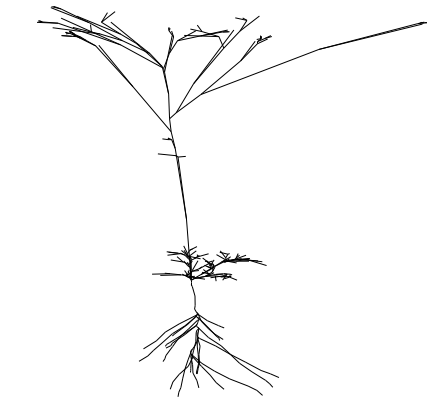

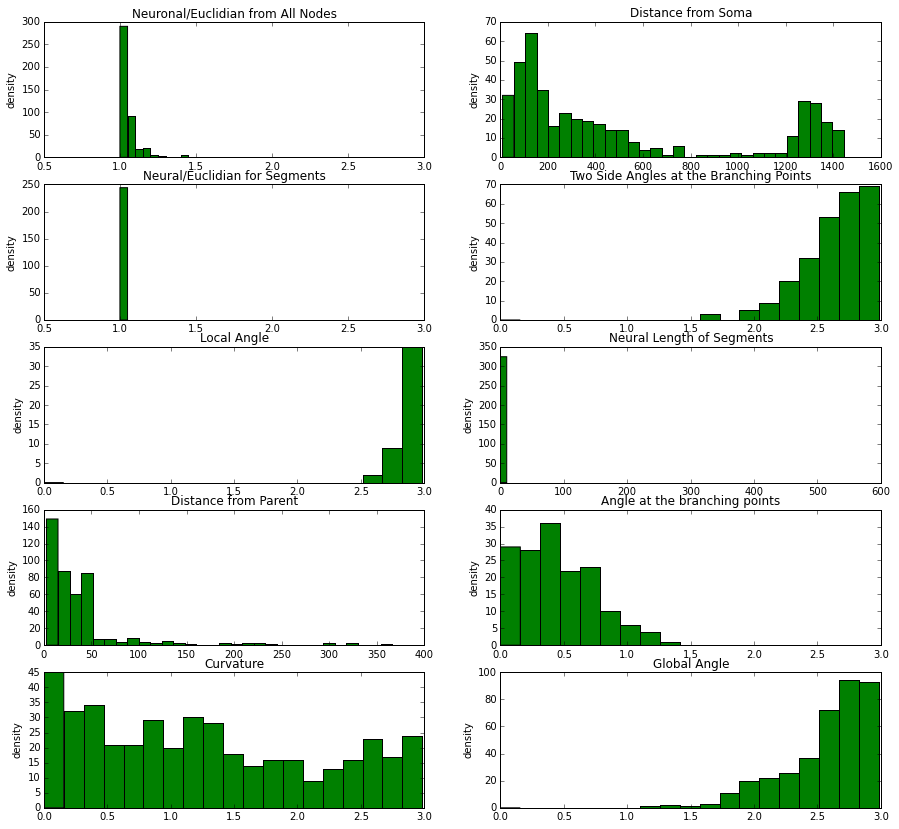

In [3]:
loc = "/Volumes/Arch/Downloads/NeuGen-master/NeuGen/L5/1.txt"
s = McNeuron.neuron_util.read_hoc_format(loc)
n = McNeuron.Neuron(input_format='Matrix of swc', input_file=s)
McNeuron.visualize.plot_2D(n, size_x=6, size_y=6)
n.fit()
n.show_features()

In [ ]:
McNeuron.visualize.show_database(c)

In [ ]:
d = []
for i in range(1,5):
    loc = "/Volumes/Arch/Downloads/NeuGen-master/NeuGen/L5/"+str(i)+".txt"
    s = McNeuron.neuron_util.read_hoc_format(loc)
    n = McNeuron.Neuron(input_format='Matrix of swc', input_file=s)
    purne_n, dis = McNeuron.subsample.straight_subsample_with_fixed_number(n, 200)
    McNeuron.visualize.plot_2D(n, size_x=2, size_y=2)
    n.fit()
    d.append(n)

In [ ]:
neu = McNeuron.NeuronCollection.Collection(input_format = 'neuron', input_file = d)

In [ ]:
neu.set_features()
neu.hist_features = hist_features
neu.vec_value = vec_value
neu.set_value(list_features=value_features)
neu.set_hist(list_features = hist_features,
           hist_range=hist_features)
neu.set_vec_value(vec_value)

In [ ]:
McNeuron.visualize.show_database(neu)

In [ ]:
name = 'curvature'
m = c.mean_hist[name]
v = c.std_hist[name]/5
f, axs = plt.subplots(1,1)
x=c.hist_features[name][1:]
#
axs.plot(x,m)
axs.fill_between(x, y1=m+v, y2=m-v, alpha = .1)
#plt.show()
#plt.plot(neu.hist_features[name][1:], m)
#plt.show()
plt.savefig("/Volumes/Arch/c-curvature.eps", format = "eps")

In [ ]:
a = McNeuron.visualize.plot_2D(neu.database[1], save="/Volumes/Arch/neu.eps")

In [ ]:
import sys,time
import os, sys
from matplotlib.cm import get_cmap
from Crypto.Protocol.AllOrNothing import isInt
sys.setrecursionlimit(10000)
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.animation as animation
import pylab as pl
from matplotlib import collections  as mc
from PIL import Image
from numpy.linalg import inv

from McNeuron import Neuron
from McNeuron import Node

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec

from numpy import mean,cov,double,cumsum,dot,linalg,array,rank
from pylab import plot,subplot,axis,stem,show,figure, Normalize
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import pylab as pl
import matplotlib
from matplotlib import collections  as mc
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

def plot_2D(neuron,
            background=1,
            show_width=False,
            show_depth=False,
            size_x=5,
            size_y=5,
            dpi=80,
            line_width=1,
            show_soma=False,
            give_image=False,
            red_after=False,
            node_red=0,
            translation=(0, 0),
            scale_on=False,
            scale=(1, 1),
            save=[]):

    depth = neuron.location[2, :]
    p = neuron.location[0:2, :]
    if scale_on:
        p[0, :] = scale[0] * (p[0, :]-min(p[0, :]))/(max(p[0, :]) - min(p[0, :]))
        p[1, :] = scale[1] * (p[1, :]-min(p[1, :]))/(max(p[1, :]) - min(p[1, :]))
    widths= neuron.diameter
    #widths[0:3] = 0
    m = min(depth)
    M = max(depth)
    depth = background * ((depth - m)/(M-m))
    colors = []
    lines = []
    patches = []

    for i in range(neuron.n_soma):
        x1 = neuron.location[0, i] + translation[0]
        y1 = neuron.location[1, i] + translation[1]
        r = widths[i]
        circle = Circle((x1, y1), r, color=str(depth[i]), ec='none', fc='none')
        patches.append(circle)

    pa = PatchCollection(patches, cmap=matplotlib.cm.gray)
    pa.set_array(depth[0]*np.zeros(neuron.n_soma))

    for i in range(len(neuron.nodes_list)):
        colors.append(str(depth[i]))
        j = neuron.parent_index[i]
        lines.append([(p[0,i] + translation[0],p[1,i] + translation[1]),(p[0,j] + translation[0],p[1,j] + translation[1])])

    if(show_width):
        if(show_depth):
            lc = mc.LineCollection(lines, colors=colors, linewidths = line_width*widths)
        else:
            lc = mc.LineCollection(lines, linewidths = line_width*widths)
    else:
        if(show_depth):
            lc = mc.LineCollection(lines, colors=colors, linewidths = line_width)
        else:
            lc = mc.LineCollection(lines, linewidths = line_width, color = 'k')

    if(give_image):
        if(red_after):
            line1 = []
            line2 = []
            (I1,) = np.where(~np.isnan(neuron.connection[:,node_red]))
            (I2,) = np.where(np.isnan(neuron.connection[:,node_red]))
            for i in I1:
                j = neuron.parent_index[i]
                line1.append([(p[0,i],p[1,i]),(p[0,j],p[1,j])])
                lc1 = mc.LineCollection(line1, linewidths = 2*line_width, color = 'r')
            for i in I2:
                j = neuron.parent_index[i]
                line2.append([(p[0,i],p[1,i]),(p[0,j],p[1,j])])
                lc2 = mc.LineCollection(line2, linewidths = line_width, color = 'k')
            return (lc1, lc2, (min(p[0,:]),max(p[0,:])), (min(p[1,:]),max(p[1,:])))
        else:
            return (lc, (min(p[0,:]),max(p[0,:])), (min(p[1,:]),max(p[1,:])))
    else:
        fig, ax = plt.subplots()
        ax.add_collection(lc)
        if(show_soma):
            ax.add_collection(pa)
        fig.set_size_inches([size_x + 1, size_y + 1])
        fig.set_dpi(dpi)
        plt.axis('off')
        plt.xlim((min(p[0,:]),max(p[0,:])))
        plt.ylim((min(p[1,:]),max(p[1,:])))
        plt.savefig(save, format = "eps")
    

In [ ]:
c = McNeuron.NeuronCollection.Collection(input_format='swc', 
                                        input_file=L_neuron[1500:1512])

In [ ]:
plot_2D(c.database[9], save="/Volumes/Arch/real1.eps")

In [ ]:
np.where(n.parent_index == 7)

In [ ]:
n.location[:, 8]

In [ ]:
n.location[:, 29]

In [ ]:
n.fit()
n.show_features()

In [ ]:
a = n.features['ratio_euclidian_neuronal']
plt.hist(a[~np.isnan(a)])

In [ ]:
plt.plot(n.features['self_avoidance'])

In [ ]:
n.n_node

In [ ]:
n.features['neuronal/euclidean']

In [ ]:
plt.plot(n.features['discrepancy_space'])

In [ ]:
plt.imshow(np.reshape(n.features['pictural_image_xy'],[10,10]))

In [ ]:
import numpy as np
import McNeuron
import McNeuron as mcn
import matplotlib.pyplot as plt
from copy import deepcopy
from numpy.linalg import inv
%matplotlib inline
loc = "/Volumes/Arch/Dropbox/HG-GAN/03-Data/pyramidal"
L_neuron = mcn.NeuronCollection.get_all_path(loc)
hist_features = {
    'branch_angle': np.arange(0,np.pi,np.pi/20),
    'side_branch_angle': np.arange(0,np.pi,np.pi/20),
    'global_angle': np.arange(0,np.pi,np.pi/20),
    'local_angle': np.arange(0,np.pi,np.pi/20),
    'curvature' : np.arange(0,np.pi,np.pi/20),
    'neural_important' : np.arange(0,150,10),
    'distance_from_parent' : np.arange(0,60,5),
    }
value_features = {
    'Nnodes',
    'Nbranch',
    #'Nsoma',
    'initial_segments',
    #'ratio_neural_euclidian_important',
    #'ratio_euclidian_neuronal',
    'Npassnode',
    'segmental_neuronal/euclidean',
    'neuronal/euclidean'
}
vec_value = {
    'pictural_image_xy',
    'discrepancy_space',
    'self_avoidance',
    'ratio_diameter_euclidean'
}


# c = McNeuron.NeuronCollection.Collection(input_format='swc', 
#                                           input_file=L_neuron[1830:1836])
c = McNeuron.NeuronCollection.Collection(input_format='swc', 
                                        input_file=L_neuron[1500:1508])
c.set_features()
c.hist_features = hist_features
c.vec_value = vec_value
c.set_value(list_features=value_features)
c.set_hist(list_features = hist_features,
           hist_range=hist_features)
c.set_vec_value(vec_value)
c.avoid_zero_std(.001)

In [ ]:
McNeuron.dis_util.distance_from_database_with_name(c.database[3],c)

In [ ]:
McNeuron.dis_util.distance_from_database_with_name(n,c)

In [ ]:
def set_normlizor(c):    
    error = np.zeros([len(c.database), 17])
    dis = []
    for i in range(len(c.database)):
        neuron = c.database[i]
        a= McNeuron.dis_util.distance_from_database_with_name(neuron,c)
        dis.append(a)

    normlizer = dis[0]
    key = dis[0].keys()
    for i in range(1, len(dis)):
        for name in key:
            normlizer[name] = normlizer[name] + dis[i][name]
    for name in key:
        normlizer[name] = normlizer[name]/len(dis)
    for name in key:
        normlizer[name] = 10./normlizer[name]
    return normlizer

normlizer = set_normlizor(c)
normlizer

normlizer['pictural_image_xy'] *=1.5 
normlizer['neuronal/euclidean'] *=1.5
normlizer['ratio_diameter_euclidean'] *=.3
normlizer['self_avoidance'] *=2

In [ ]:
in_neuron = McNeuron.neuron_util.star_neuron(wing_number=7,
                                             spherical=None,
                                             node_on_each_wings=35,
                                             length=12)
#in_neuron = feature_neuron
#in_neuron = c.database[4]
per = McNeuron.MCMC(neuron=n, 
                    iterations=3, 
                    verbose=0)
per.set_mean_var_length(mean=12, var=4)

per.hist_features=hist_features
per.value_features=value_features
per.vec_value=vec_value
per.set_verbose(3)
per.set_trend()
L = {
     'extension/reduction': .1,
     'extension/reduction end points': 3.,
     #'add/remove' : 0.,
     #'rescale toward end' : 0,
     #'diameter' : 0.,
    
     'diameter_toward' : 1. ,

     'rotation for any node' : 4.,
     'rotation for branching' : 6.,
     #'location toward end' : 0.,
     #'location' : .1,
     #'location for important point' : .0,
    
     'sliding general' : .3,
     'sliding certain in distance' : 3.,
     'sliding for branching node' : .3,
     'sliding for branching node certain distance' : 3.,
     #'stretching vertical' : .0,
     #'stretching horizental' : .0
}
per.kappa_rotation = 350.
per.rescale_value = 0
per.sliding_limit = 600.
per.horizental_stretch = .1
per.vertical_stretch = .1
per.location_toward_cte = .5
per.location_important = 5.
per.set_database(c)
per.set_feature_normalizer(normlizer)
per.set_probability(L)
per.fit()
gen = per.neuron
McNeuron.visualize.plot_2D(gen,dpi = 120, line_width=2,size_x = 6);
per.show_MCMC(1,14,6)
#McNeuron.neuron_util.check_neuron(per.neuron)
#per.neuron.show_features()

In [ ]:
import pickle
per = pickle.load( open( "per2.p", "rb" ) )

In [ ]:
McNeuron.visualize.plot_2D(per.evo[199])

In [ ]:
per.evo[9]

In [ ]:
per.show_MCMC(10000, 14,6)

In [ ]:
McNeuron.dis_util.distance_from_database_with_name(per.neuron,c)